In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
df = pd.read_csv("../data/diabetes.csv")

# Teste de hipóteses

A média da taxa de glicose de pacientes diabéticos é maior do que a de pacientes não-diabéticos?

In [38]:
glucose_population = df["Glucose"].mean()
glucose_diabetic = df.loc[df["Outcome"] == 1, "Glucose"].mean()

print(f"Taxa média de glicose populacional: {glucose_population:.0f}")
print(f"Taxa média de glicose de diabéticos: {glucose_diabetic:.0f}")

Taxa média de glicose populacional: 121
Taxa média de glicose de diabéticos: 141


Será que essa diferença é significativa?

In [43]:
# Bootstrap

glucose_bootstrap_dist = []

for i in range(5000):
    glucose_bootstrap_dist.append(np.mean(df.sample(frac=1, replace=True)["Glucose"]))
    
std_error = np.std(glucose_bootstrap_dist, ddof=1)

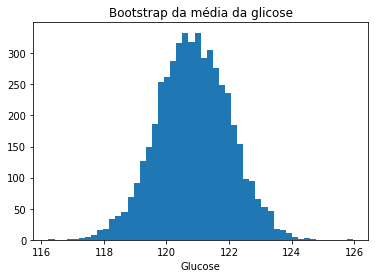

In [44]:
plt.hist(glucose_bootstrap_dist, bins=50)
plt.xlabel("Glucose")
plt.title("Bootstrap da média da glicose")
plt.show()

Podemos calcular o intervalo de confiança de 95% para essa distribuição

In [45]:
low = np.quantile(glucose_bootstrap_dist, 0.025)
high = np.quantile(glucose_bootstrap_dist, 0.975)

print(f"O intervalo de confiança de 95% é [{low:.0f}, {high:.0f}].")

O intervalo de confiança de 95% é [119, 123].


Já temos razoável certeza que a glicose de pacientes diabéticos é significativamente maior. Vamos formalizar isso com um teste de hipóteses.

$H_{A}$: A taxa de glicose de diabéticos é maior do que 121.<br>
$H_{0}$: A taxa de glicose de diabéticos é menor ou igual à 121.<br>

Temos então um teste *right-tailed*.

In [50]:
z_score = (glucose_diabetic - glucose_population) / std_error
z_score

17.628358947129453

In [70]:
# Converting to p-value

p_value = (1.0 - norm.cdf(z_score, loc=0, scale=1))
p_value

0.0

In [57]:
Nosso p-valor é tão pequeno que foi arredondado em zero. Com isso, podemos rejeitar a hipótese nula em favor da alternativa.

1.0